<a href="https://colab.research.google.com/github/vivekpenuli/employee-turnover-/blob/master/project_work_module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#step -1
import the required files and package


In [2]:
pip install anvil-uplink

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
url="https://raw.githubusercontent.com/vivekpenuli/employee-turnover-/master/HR_comma_sep.csv"

In [5]:
df=pd.read_csv(url)

In [6]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


anvil ai

In [121]:
df[df["Department"]=="sales"].head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [102]:
df[df["Department"]=="technical"].head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
35,0.10,0.94,6,255,4,0,1,0,technical,low
36,0.38,0.46,2,137,3,0,1,0,technical,low


In [103]:
df[df["Department"]=="support"].head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
46,0.40,0.55,2,147,3,0,1,0,support,low
47,0.57,0.70,3,273,6,0,1,0,support,low


In [104]:
df[df["Department"]=="IT"].head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
61,0.11,0.93,7,308,4,0,1,0,IT,medium
62,0.10,0.95,6,244,5,0,1,0,IT,medium


In [105]:
df[df["Department"]=="product_mng"].head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
66,0.43,0.54,2,153,3,0,1,0,product_mng,medium
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium


In [117]:
df[df["Department"]=="marketing"].head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
77,0.40,0.54,2,137,3,0,1,0,marketing,medium
83,0.84,0.85,4,249,6,0,1,0,marketing,low


In [107]:
df[df["Department"]=="RandD"].head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
301,0.12,1.00,3,278,4,0,1,0,RandD,medium
302,0.10,0.77,7,250,5,0,1,0,RandD,medium


In [108]:
df[df["Department"]=="accounting"].head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
28,0.41,0.46,2,128,3,0,1,0,accounting,low
29,0.38,0.50,2,132,3,0,1,0,accounting,low


In [125]:
df[df["Department"]=="hr"].head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
31,0.45,0.57,2,134,3,0,1,0,hr,low
32,0.40,0.51,2,145,3,0,1,0,hr,low


In [112]:
df[df["Department"]=="management"].head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
60,0.85,0.91,5,226,5,0,1,0,management,medium
82,0.79,0.59,4,139,3,0,1,1,management,low


#step-2
Data  cleaning<br>
Dataset used here is already clean 



In [7]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [8]:
for col in df.columns:
  print(col, " : ",len(df[col].unique()),'labels')

satisfaction_level  :  92 labels
last_evaluation  :  65 labels
number_project  :  6 labels
average_montly_hours  :  215 labels
time_spend_company  :  8 labels
Work_accident  :  2 labels
left  :  2 labels
promotion_last_5years  :  2 labels
Department  :  10 labels
salary  :  3 labels



#step-3
Dealing with Text-Data<br>
Two types of categorical data<br>
Label Encoding<br>
Ordinal Encoding


In [9]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Applying Label encoding

In [11]:
emp=pd.get_dummies(df,columns=['Department'],drop_first=True)

In [12]:
emp.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0


Move the variable "left" to the back of the table

In [13]:
last=emp['left']
emp.drop(labels=['left'],axis=1,inplace=True)
emp.insert(0,'left',last)
emp.head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1,0.38,0.53,2,157,3,0,0,low,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,0,medium,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,0,0,medium,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,low,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,low,0,0,0,0,0,0,1,0,0


Applying ordinal encoding

In [14]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [15]:
order_label={"low":1,"medium":2,"high":3}

In [16]:
emp["salary"]=emp["salary"].map(order_label)

In [17]:
emp.head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,1,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0
1,1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,1,0,0
2,1,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,1,0,0
3,1,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0
4,1,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0


In [18]:
emp[emp['salary']==3].head(5)

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
72,1,0.45,0.49,2,149,3,0,0,3,0,0,0,0,0,1,0,0,0
111,1,0.09,0.85,6,289,4,0,0,3,0,0,1,0,0,0,0,0,0
189,1,0.44,0.51,2,156,3,0,0,3,0,0,0,0,0,0,0,0,1
267,1,0.45,0.53,2,129,3,0,0,3,0,0,0,0,0,0,0,0,1
306,1,0.37,0.46,2,149,3,0,0,3,0,0,0,0,1,0,0,0,0


#step 4
Train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
target_name="left"
X = emp.drop('left', axis=1)
y=emp[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
X_train[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
9838,1.00,0.61,3,188,4,0,0,1,0,0,0,0,0,1,0,0,0
7689,0.16,0.78,4,196,5,0,0,3,0,0,0,0,0,0,0,0,1
6557,0.80,0.80,3,175,2,0,0,2,1,0,0,0,0,0,0,0,0
6872,0.66,0.86,4,112,6,0,0,2,0,1,0,0,0,0,0,0,0
820,0.11,0.93,7,284,4,0,0,1,0,0,0,0,0,0,0,0,1


In [22]:
y_train[:5]

9838    0
7689    0
6557    0
6872    0
820     1
Name: left, dtype: int64

#step 5
<h3>Model building 

<h3>Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [24]:
skk=StratifiedKFold(shuffle=True,n_splits=10)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

confusion matrix

In [25]:
pre=logreg.predict(X_test)

In [26]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual or Truth')
    plt.xlabel('Prediction')

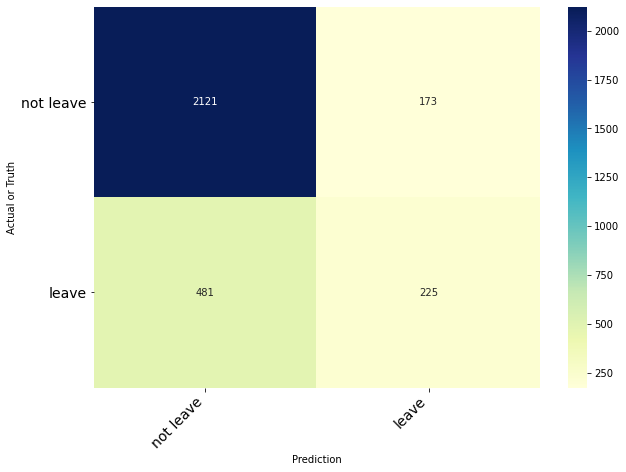

In [27]:
cm = confusion_matrix(y_test,pre)
print_confusion_matrix(cm,["not leave","leave"])

In [28]:
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.32      0.41       706

    accuracy                           0.78      3000
   macro avg       0.69      0.62      0.64      3000
weighted avg       0.76      0.78      0.76      3000



<H3>DECISION TREE

In [29]:
treemodel = tree.DecisionTreeClassifier()
skk=StratifiedKFold(shuffle=True,n_splits=10)
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
score3=cross_val_score(treemodel,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score3.mean())

0.9789980539338339


In [31]:
score2=cross_val_score(treemodel,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score2.mean())

0.9646666666666667


In [32]:
pretree=treemodel.predict(X_test)

In [33]:
print(classification_report(y_test,pretree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.93      0.96      0.95       706

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.97      0.97      3000



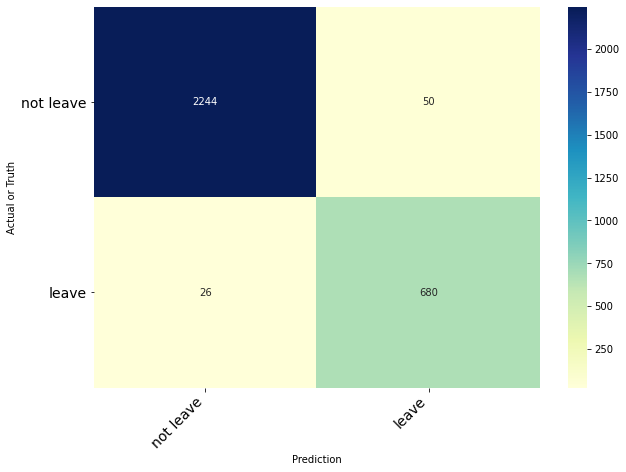

In [34]:
cm = confusion_matrix(y_test,pretree)
print_confusion_matrix(cm,["not leave","leave"])

<h3>Random Forest

In [35]:
rtreemodel = RandomForestClassifier()
rtreemodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
rpretree=rtreemodel.predict(X_test)

In [37]:
score7=cross_val_score(rtreemodel,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score7.mean())

0.9914994439810954


In [38]:
score8=cross_val_score(rtreemodel,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score8.mean())

0.9773333333333334


In [39]:
print(classification_report(y_test,rpretree))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



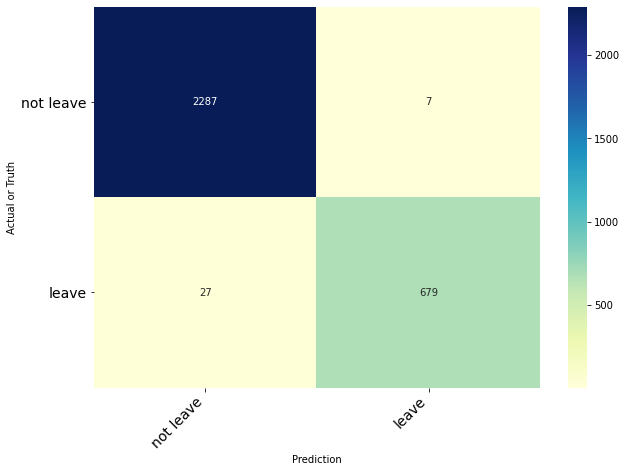

In [40]:
cm = confusion_matrix(y_test,rpretree)
print_confusion_matrix(cm,["not leave","leave"])

support vector machine 

In [41]:
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
svcpre=svc.predict(X_test)

In [43]:
score11=cross_val_score(svc,X_train,y_train,cv=skk,scoring='accuracy') # Training score
print(score11.mean())

0.7836485265499028


In [44]:
score12=cross_val_score(svc,X_test,y_test,cv=skk,scoring='accuracy') # Testing score
print(score12.mean())

0.7646666666666667


In [45]:
print(classification_report(y_test,svcpre))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2294
           1       0.98      0.08      0.16       706

    accuracy                           0.78      3000
   macro avg       0.88      0.54      0.52      3000
weighted avg       0.83      0.78      0.71      3000



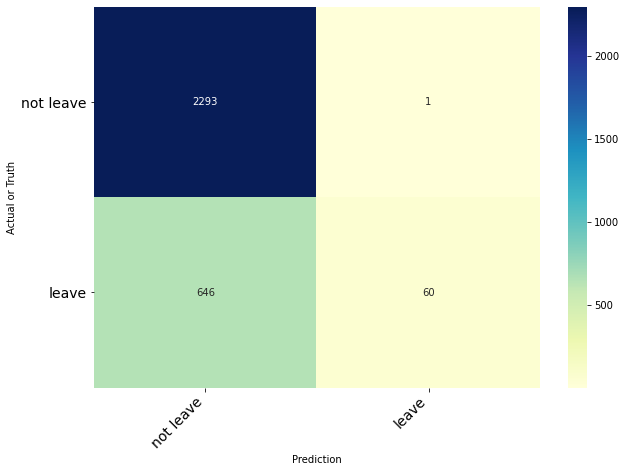

In [46]:
cm = confusion_matrix(y_test,svcpre)
print_confusion_matrix(cm,["not leave","leave"])

SAVING THE  BEST MODEL 

In [47]:
import pickle

save model

In [48]:
with open('vivek_model_pickle_3','wb') as file:
    pickle.dump(rtreemodel,file)

run model

In [49]:
with open('vivek_model_pickle_3','rb') as file:
    vivek_model_3= pickle.load(file)

use model

In [50]:
vivek_model_3.predict([[1.0,0.61,3,188,4,0,0,1,0,0,0,0,0,1,0,0,0]])

array([0])

In [51]:
vivek_model_3.predict([[0.11,0.93,7,284,4,0,0,1,0,0,0,0,0,0,0,0,1]])

array([1])

In [55]:
kapil=vivek_model_3.predict([[0.11,0.93,7,284,4,0,0,1,0,0,0,0,0,0,0,0,0]])

In [65]:
d=float(kapil)
d

1.0

In [88]:
import anvil.server

anvil.server.connect("KWOQVHGDRYPKCEI3C2YZYVUH-5MBLKQSGXCIBX5I7")


In [90]:
@anvil.server.callable
def get_data(a,b,c,d,e,f,g,h,i):
  if h=="technical" :
    score=vivek_model_3.predict([[a,b,int(c),d,int(e),int(f),int(g),int(i),0,0,0,0,0,0,0,0,1]])
  elif h=="RandD" :
    score=vivek_model_3.predict([[a,b,int(c),d,int(e),int(f),int(g),int(i),1,0,0,0,0,0,0,0,0]])
  elif h=="accounting" :
    score=vivek_model_3.predict([[a,b,int(c),d,int(e),int(f),int(g),int(i),0,1,0,0,0,0,0,0,0]])
  elif h=="HR" :
    score=vivek_model_3.predict([[a,b,int(c),d,int(e),int(f),int(g),int(i),0,0,1,0,0,0,0,0,0]])
  elif h=="management" :
    score=vivek_model_3.predict([[a,b,int(c),d,int(e),int(f),int(g),int(i),0,0,0,1,0,0,0,0,0]])
  elif h=="marketing":
    score=vivek_model_3.predict([[a,b,int(c),d,int(e),int(f),int(g),int(i),0,0,0,0,1,0,0,0,0]])
  elif h=="product_mng":
    score=vivek_model_3.predict([[a,b,int(c),d,int(e),int(f),int(g),int(i),0,0,0,0,0,1,0,0,0]])
  elif h=="sales" :
    score=vivek_model_3.predict([[a,b,int(c),d,int(e),int(f),int(g),int(i),0,0,0,0,0,0,1,0,0]])
  elif h=="support":
    score=vivek_model_3.predict([[a,b,int(c),d,int(e),int(f),int(g),int(i),0,0,0,0,0,0,0,1,0]])
  elif h=="IT":
    score=vivek_model_3.predict([[a,b,int(c),d,int(e),int(f),int(g),int(i),0,0,0,0,0,0,0,0,0]])
  else:
    score=7
 ## print(f"Hello from your own machine, {name}!")
  return ('your employee will' if score > 0.5 else 'go', int(score))